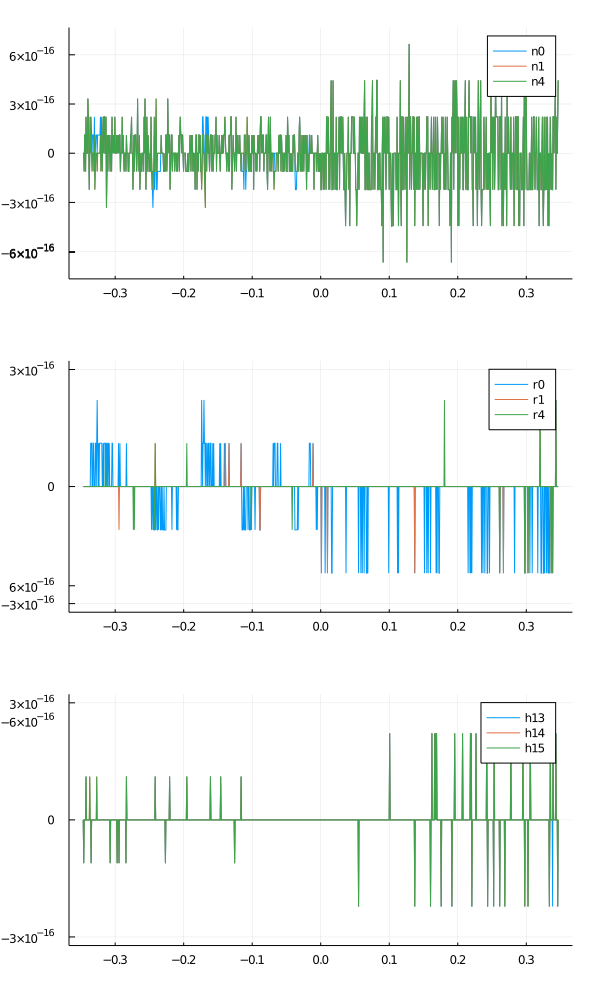

In [53]:
using Plots, Plots.PlotMeasures
include("./program.jl")
h = hornerexp; n = naiveexp; r = rnaiveexp
u = eps(0.5) # macheps
diff(f) = f.(reduced_domain) - exp.(reduced_domain)
p1 = plot(reduced_domain, map(diff, [n(u), n(u/10), n(u/10000)]), label=["n0" "n1" "n4"], margin=5mm)
p2 = plot(reduced_domain, map(diff, [r(u), r(1e-17), r(u/10000)]), label=["r0" "r1" "r4"], margin=5mm)
p3 = plot(reduced_domain, map(diff, [h(13), h(14), h(15)]), label=["h13" "h14" "h15"], margin=5mm)
plot(p1,p2,p3, layout=@layout[a;b;c], size=(600,1000))


Liczby |u| < 1/2ln2 z algorytmu na redukcję dziedziny będą ułożone równomiernie w (-ln2/2, ln2/2), jeśli początkowe x były równomiernie rozłożone na odpowiednio dużym przedziale. (u to coś podobnego do przeskalowanej części ułamkowej).
Dlatego w eksperymencie rozpatrzyłem tablicę równomiernie rozłożonych liczb z dziedziny, nie ma potrzeby się np. skupiać na zerze.

Przeanalizowałem wykresy dla różnych parametrów:
* tak jak można przewidzieć, zmniejszanie epsilona w naiveexp nic nie zmienia (dodajemy bardzo małą liczbę do sumy wynoszącej ok. 0.7-1.4)
* rnaiveexp daje czasami liczbę zmiennoprzecinkową tuż obok tej danej przez wbudowany exp, lekkie zmniejszenie epsilona zmniejsza liczbę takich sytuacji
* Dla wyliczonego n=14 mamy wyniki nie dalej niż jeden float od wyniku danego przez wbudowany exp, zdarza się to dla względnie małej liczby argumentów.
* Nie widzę sensu redukowania problemu do liczb dodatnich lub ujemnych używając e^-x=1/e^x.
  Na lewej połowie błędy bezwzględne wydają się mniejsze, ale na prawej nie mogą być takie bo liczby zmiennoprzecinkowe w [1,2) są rzadsze niż w [0.5,1). Błędy względne wyglądałyby mniej więcej tak samo.


 

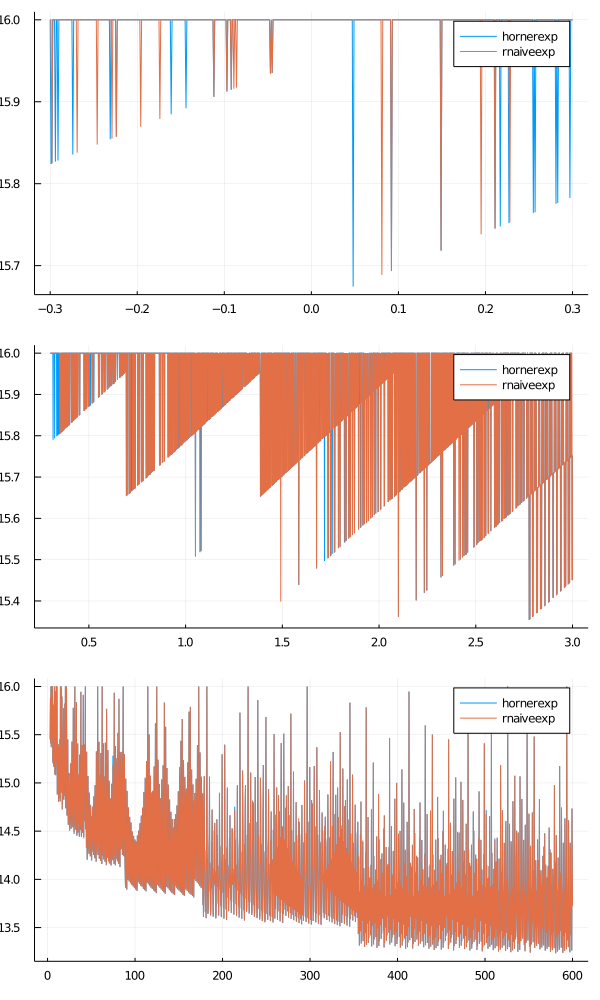

In [89]:
using Plots, Plots.PlotMeasures
include("./program.jl")
h = calcexp(hornerexp(14)); n = calcexp(naiveexp(1e-17)); r = calcexp(rnaiveexp(1e-17))
s1 = (-0.3:0.001:0.3)
s2 = (0.3:0.001:3)
s3 = (3:0.3:600)
s4 = (-0.3:-0.01:-3)
s5 = (-3:-3:-708)

dh = acc ∘ relerr(h)
dr = acc ∘ relerr(r)
dn = acc ∘ relerr(n)

p1 = plot(s1, [dh.(s1), dr.(s1)], label=["hornerexp" "rnaiveexp" "naiveexp"])
p2 = plot(s2, [dh.(s2), dr.(s2)], label=["hornerexp" "rnaiveexp" "naiveexp"])
p3 = plot(s3, [dh.(s3), dr.(s3)], label=["hornerexp" "rnaiveexp" "naiveexp"])
#p4 = plot(s4, [relerr(h).(s4), relerr(r).(s4)], label=["h" "r" "n"], margin=5mm)
#p5 = plot(s5, [relerr(h).(s5), relerr(r).(s5)], label=["h" "r" "n"], margin=5mm)
#p4 symetryczny do p2
#p5 symetryczny do p3
plot(p1,p2,p3, layout=@layout[a;b;c], size=(600,1000))
